In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore") 

In [4]:
df=pd.read_csv("Fraud.csv")
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
label=LabelEncoder()
df['type']=label.fit_transform(df['type'])
df['nameOrig']=label.fit_transform(df['nameOrig'])
df['nameDest']=label.fit_transform(df['nameDest'])

In [8]:
X=df.drop(labels=['isFraud'], axis=1)
y=df["isFraud"]

In [9]:
Minscaler = preprocessing.MinMaxScaler()
x_scaled = Minscaler.fit_transform(X)
df_scaled=pd.DataFrame(x_scaled,columns=X.columns)
df_scaled.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,0.0,0.75,0.000984,0.119042,0.004369,0.004116,0.619019,0.000000,0.0,0.0
1,0.0,0.75,0.000186,0.342716,0.000546,0.000498,0.644568,0.000000,0.0,0.0
2,0.0,1.00,0.000018,0.156936,0.000005,0.000000,0.174359,0.000000,0.0,0.0
3,0.0,0.25,0.000018,0.916983,0.000005,0.000000,0.155043,0.000543,0.0,0.0
4,0.0,0.75,0.001167,0.538621,0.001067,0.000767,0.317554,0.000000,0.0,0.0


In [42]:

X_train, X_test, y_train, y_test = train_test_split(df_scaled, y,
    test_size=0.2, shuffle = True)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25) 

In [40]:
X_val.shape

(38519, 10)

In [12]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = model.score(X_test,y_test)
print(accuracy)
confusion_matrix(y_test,predicted_classes)

0.9993769308652872


array([[38490,     2],
       [   22,     5]])

In [14]:
sk= StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
Skf = []
  
for train_index, test_index in sk.split(X,y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model.fit(x_train_fold, y_train_fold)
    Skf.append(model.score(x_test_fold, y_test_fold))
Skf

[0.9993250084373946,
 0.9993509696513408,
 0.9992730671374422,
 0.9993509528012877,
 0.9992730671374422]

In [ ]:
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = model.score(X_test,y_test)
print(accuracy)
confusion_matrix(y_test,predicted_classes)

0.9989318837469899


array([[209475,      0],
       [   224,     16]])

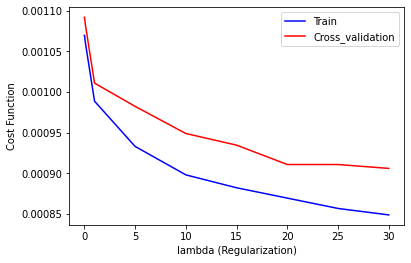

In [ ]:
predict_val=[]
predict_train=[]
min=[]
C_param_range = [0.001,0.01,0.1,1,5,10,15,20,25,30]
for i in C_param_range:
    log=LogisticRegression(C=i)
    log.fit(X_train,y_train)
    pred_val=log.predict(X_val)
    accuracy_val=accuracy_score(y_val,pred_val)
    err_val=1-accuracy_val
    predict_val.append(1-accuracy_val)
    
    pred_train=log.predict(X_train)
    accuracy_train=accuracy_score(y_train,pred_train)
    predict_train.append(1-accuracy_train)


    
fig, ax = plt.subplots()
ax.plot(C_param_range, predict_train, '-b', label='Train')
ax.plot(C_param_range, predict_val, '-r', label='Cross_validation')
plt.xlabel("lambda (Regularization)")
plt.ylabel("Cost Function")
leg = ax.legend();

In [ ]:
diff=[]
for i in range (len(predict_val)):
 
  diff.append(np.abs(predict_val[i] - predict_train[i]))

best_alpha=C_param_range[np.argmin(diff)]
best_alpha


1

In [ ]:
logreg = LogisticRegression(C=best_alpha)
logreg.fit(X_train, y_train)
predicted_classes = logreg.predict(X_test)
accuracy = logreg.score(X_test,y_test)
print(accuracy)
confusion_matrix(y_test,predicted_classes)

0.9989318837469899


array([[209475,      0],
       [   224,     16]])

In [46]:
predict_val_l1=[]
predict_train_l1=[]

C = [0.001,0.01,0.1,1,5,10,15,20,25,30]
for i in C:
    log=LogisticRegression(C=i, penalty='l1', solver='liblinear')
    log.fit(X_train,y_train)
    pred_val_l1=log.predict(X_val)
    accuracy_val_l1=accuracy_score(y_val,pred_val_l1)
    err_val=1-accuracy_val
    predict_val_l1.append(1-accuracy_val)
    
    pred_train_l1=log.predict(X_train)
    accuracy_train_l1=accuracy_score(y_train,pred_train_l1)
    predict_train_l1.append(1-accuracy_train)


    
# fig, ax = plt.subplots()
# ax.plot(C, predict_train_l1, '-b', label='Train')
# ax.plot(C, predict_val_l1, '-r', label='Cross_validation')
# plt.xlabel("lambda (Regularization)")
# plt.ylabel("Cost Function")
# leg = ax.legend();

In [48]:
diff_l1=[]
for i in range (len(predict_val_l1)):
 
  diff_l1.append(np.abs(predict_val_l1[i] - predict_train_l1[i]))

best_al=C[np.argmin(diff_l1)]
best_al


0.001

In [36]:
logreg = LogisticRegression(C=best_al)
logreg.fit(X_train, y_train)
predicted_classes = logreg.predict(X_test)
accuracy = logreg.score(X_test,y_test)
print(accuracy)
confusion_matrix(y_test,predicted_classes)

0.9992990472234482


array([[38492,     0],
       [   27,     0]])

In [ ]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = model.score(X_test,y_test)
print(accuracy)
confusion_matrix(y_test,predicted_classes)

0.9991655341773359


array([[209467,      8],
       [   167,     73]])